In [1]:
import os
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnsit = keras.datasets.fashion_mnist # load the data set from Keras
(train_images, train_labels), (test_images, test_labels) = fashion_mnsit.load_data() # split the data into training and testing

In [3]:
train_images.shape
# type(train_images)

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
train_images[0,23,23] # 1 pixel

194

In [6]:
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

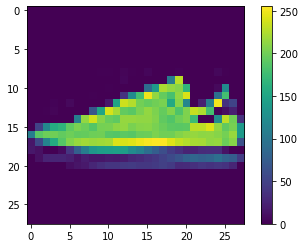

In [8]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

# Data preprocessing
    * if i have massive amounts of vlaues but small weights then better to map the values to a small value by maybe dividing the value with 255 if it is pixels we are dealing with to map the values between 0 and 1??

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

Creating the model
--------------------------

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),  # the input layer - Flatten literally flattens the 28*28 matrix to 784 neurons
    keras.layers.Dense(128, activation = 'relu'),  # the 1st hidden layer - 128 neurons are there in this layer
    keras.layers.Dense(10, activation = 'softmax') # the output layer - for each class there will be a neuron in the output layer
])

Compile the model
----------------------

In [11]:
# hyper parameter tuning - process of changing parameters and checking how the model will work
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']                     # the metric we will be looking at
)

train the model
-----------------
    * overfitting can happen when trainng the model

In [12]:
model.fit(
    x = train_images, 
    y = train_labels, 
    epochs = 10           # epoch = iterations of the database
) 

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4994 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3734 - accuracy: 0.8669
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3381 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3139 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2953 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2796 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2565 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2479 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

Evaluating the model
----------------------------

In [13]:
test_loss, test_accuracy = model.evaluate(
    x = test_images, 
    y = test_labels, 
    verbose = 1
)

print('Test Accuracy: ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3459 - accuracy: 0.8723
Test Accuracy:  0.8723000288009644


Make predicitions
-------

In [14]:
predicitions = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
print(class_names[np.argmax(predicitions[2])]) # maximum index of the 0th row

Trouser


In [17]:
print(predicitions[0])

[2.3928720e-08 1.3291224e-10 8.8018597e-09 7.2110329e-10 6.4493105e-10
 2.2364098e-03 1.2365152e-06 2.1815732e-02 2.8453755e-06 9.7594380e-01]


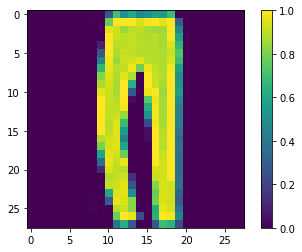

In [18]:
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

input number 58


1/1 [==============================] - 0s 30ms/step


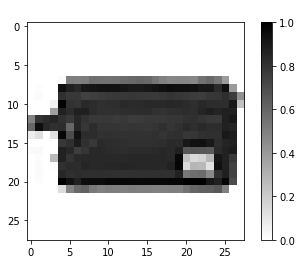

In [19]:
color = 'white'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, class_names[correct_label], predicted_class)
    
def show_image(image, label, guess):
    plt.figure()
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input("input number")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
            else:
                prit('Try again!!')
                
######
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
        
    

In [20]:
class_names[test_labels[999]]

'Sneaker'

# Convolutional Neural Networks - aka. Computer vision

In [2]:
from tensorflow.keras import datasets, layers, models

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
# normalize the data so that it is between 0 and 1 - easier to work with when inside this regions
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

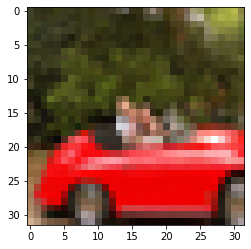

In [6]:
img_index = 99

plt.imshow(train_images[img_index], cmap = plt.cm.binary)
plt.xlabel = class_names[train_labels[img_index][0]]
plt.show()

# CNN Architecture

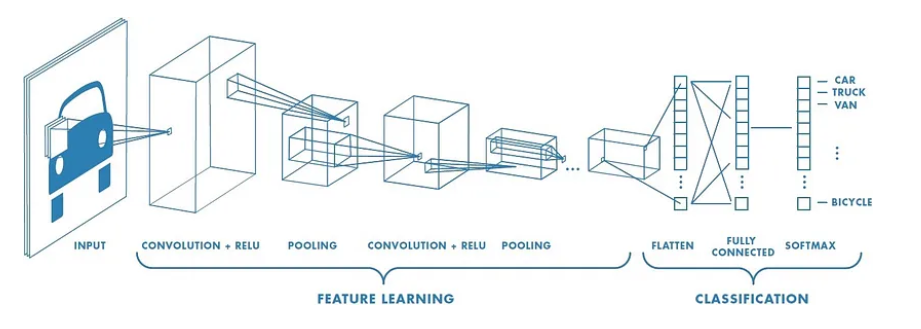

* The Convolutional Base
------

In [7]:
model = models.Sequential()
# add 1st convolutional layer
model.add(layers.Conv2D(
            filters = 32,
            kernel_size = (3,3),      # the size of the filter
            activation = 'relu',
            input_shape = (32, 32, 3) # the number of rows, columns and channels
         ))
# add 1st pooling layer
model.add(layers.MaxPooling2D(
            pool_size = (2,2)
         ))
# add 2nd convolutional layer
model.add(layers.Conv2D(
            filters = 64,
            kernel_size = (3,3),
            activation = 'relu'
         ))
# add 2nd pooling layer
model.add(layers.MaxPooling2D(
            pool_size = (2,2)
         ))
# add 3rd convolutional layer
model.add(layers.Conv2D(
            filters = 64,
            kernel_size = (3,3),
            activation = 'relu'
         ))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

* Adding Dense layers
    * actual classification is done using this
    * this is a nomal neural network - perceptron
----------------

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 10)) # units 1 for each class

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Train the model - COMPILE + FIT(train)

In [11]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

history = model.fit(
            x = train_images,
            y = train_labels,
            epochs = 5,
            validation_data = (test_images, test_labels) # because we need to evaluate the model according to the test_images and the tes_labels
         )

Epoch 1/5
1563/1563 [==============================] - 82s 51ms/step - loss: 1.5095 - accuracy: 0.4462 - val_loss: 1.2544 - val_accuracy: 0.5554
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1646 - accuracy: 0.5833 - val_loss: 1.1031 - val_accuracy: 0.6123
Epoch 3/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0251 - accuracy: 0.6398 - val_loss: 1.0092 - val_accuracy: 0.6524
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9254 - accuracy: 0.6754 - val_loss: 0.9309 - val_accuracy: 0.6713
Epoch 5/5
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8508 - accuracy: 0.7029 - val_loss: 0.8978 - val_accuracy: 0.6836


# Evaluate the model

In [12]:
test_loss, test_acc = model.evaluate(x = test_images, y = test_labels, verbose = 2)
print(test_acc)

313/313 - 4s - loss: 0.8978 - accuracy: 0.6836 - 4s/epoch - 12ms/step
0.6836000084877014


## Data Augmentation
    *  a way to increase a small dataset size

In [13]:
from keras.preprocessing import image as keras_image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [14]:
# Create data generator
datagen = ImageDataGenerator(
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True,
                fill_mode = 'nearest'
          )

# Pick an image to transform
test_img = train_images[99]
img = keras.preprocessing.image.img_to_array(test_img)  # convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

# for batch in datagen.flow(img, save_prefix = 'test', save_format = 'jpeg'):
#     plt.figure(i)
#     plot = plt.imshow(keras.preprocessing.image.img_to_array(batch[0]))
#     i += 1
#     if i > 4:
#         break

# plt.show()


# Using a pretrained model

In [15]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [16]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
                                                        'cats_vs_dogs',
                                                        split = ['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                                        with_info = True,
                                                        as_supervised = True
                                                  )

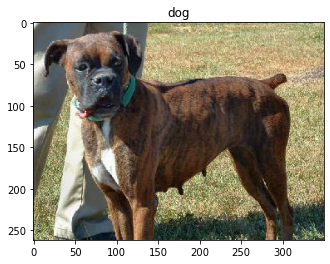

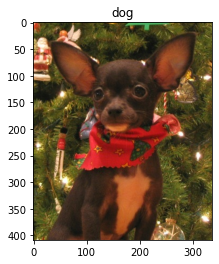

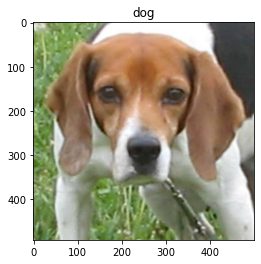

In [17]:
get_label_name = metadata.features['label'].int2str # a function that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(3):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))


## Data preprocessing

In [18]:
# the image sizes are different it seems ... lets make them all to the same size
img_size = 160

def format_example(image, label):
    """
    returns an image which is reshaped to the img_size
    """
    image = tf.cast(image, tf.float32) # convert a tensor to a new type - each and every pixel value as a float
    image = (image / 127.5) - 1
    image = tf.image.resize(image, (img_size, img_size)) # the new height and the new width
    return image, label

# apply the function to all our images
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

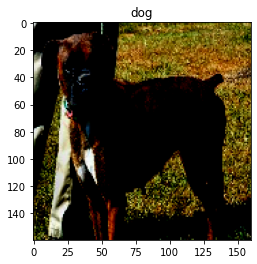

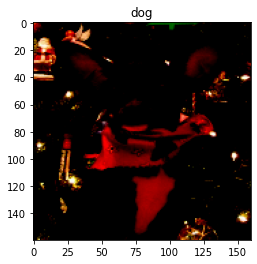

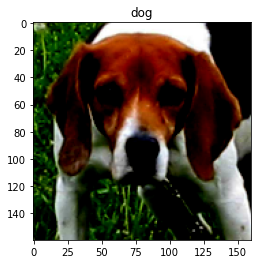

In [19]:
for image, label in train.take(3):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [21]:
# shuffle and batch the images

batch_size = 32
shuffle_buffer_size = 1000

train_batches = train.shuffle(shuffle_buffer_size).batch(batch_size)
validation_batches = validation.batch(batch_size)
test_batches = test.batch(batch_size)

In [22]:
img_shape = (img_size, img_size, 3)
 
# Create the base model of the pre trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(
                 input_shape = img_shape,
                 include_top = False,     # to not to use the classifier which is already there in MobileNetV2
                 weights = 'imagenet'
             )

In [55]:
# base_model.summary()

## freeze the loaded convolutional base
    * otherwise the weights and the biases will be generated again... we dont need that.
    * to do this we need to disable the trainable preoperty of the base

In [23]:
base_model.trainable = False

In [54]:
# base_model.summary()

## Adding my own classifier on top of the pretrained base
    * here i only need to predict whether a certain image is either a cat or a dog
    * so the out put layer should only have 1 neuron... so inorder to a dimension decrease i need to use a pooling layer 
      [in this case a GlobalAveragePooling2D]

In [24]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [25]:
# output/ predication layer
prediction_layer = keras.layers.Dense(1)

# Create the model

In [26]:
model = tf.keras.Sequential([
            base_model,
            global_average_layer,
            prediction_layer
        ])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


# train the model - Compile and Fit

In [33]:
base_learning_rate = 0.0001 # so that we do very little changes for the base weights and biases...

model.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = base_learning_rate), # RMSprop is an optimizer that uses the RMSprop algorithm
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),     # the values most close to 1
    metrics = ['accuracy']
)

# evaluate before training to see how it does because we have a seperate dataset to do validations

In [34]:
initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(
                       x = validation_batches,
                       steps = validation_steps
                   )

20/20 [==============================] - 17s 581ms/step - loss: 0.8048 - accuracy: 0.5469


In [36]:
hitory = model.fit(
            x = train_batches,
            epochs = initial_epochs,
            validation_data = validation_batches
         )

acc = history.history['accuracy']

Epoch 1/3
582/582 [==============================] - 412s 687ms/step - loss: 0.2214 - accuracy: 0.9055 - val_loss: 0.0932 - val_accuracy: 0.9656
Epoch 2/3
582/582 [==============================] - 406s 694ms/step - loss: 0.0737 - accuracy: 0.9740 - val_loss: 0.0669 - val_accuracy: 0.9751
Epoch 3/3
582/582 [==============================] - 410s 702ms/step - loss: 0.0586 - accuracy: 0.9786 - val_loss: 0.0575 - val_accuracy: 0.9785


In [37]:
print(acc)

[0.44617998600006104, 0.5832800269126892, 0.6398000121116638, 0.6754400134086609, 0.7028999924659729]


# Save the model

In [38]:
model.save('dogs_vs_cats.h5') # .h5 is a keras specific extension

# Load a model

In [43]:
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')